In [49]:
import numpy as np
import pandas as pd
import eda_helper_functions
from sklearn.ensemble import IsolationForest

In [31]:
train = pd.read_csv("F:/Data Science/EDA_with_Sagemaker/dataset/train.csv")

In [32]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,09:25:00,18:30:00,545,1,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,14:00:00,19:00:00,300,1,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1,No Info,6152


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          6695 non-null   object
 1   date_of_journey  6695 non-null   object
 2   source           6695 non-null   object
 3   destination      6695 non-null   object
 4   dep_time         6695 non-null   object
 5   arrival_time     6695 non-null   object
 6   duration         6695 non-null   int64 
 7   total_stops      6695 non-null   int64 
 8   additional_info  6695 non-null   object
 9   price            6695 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 523.2+ KB


- Some of the columns have dtypes issue so let's correct there dtypes

In [34]:
(
train
    .assign(**{
        col : pd.to_datetime(train[col], dayfirst=True, format='mixed') for col in ['date_of_journey', 'arrival_time', 'dep_time']
    })
    .info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6695 non-null   int64         
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 523.2+ KB


In [35]:
train = (
train
    .assign(**{
        col : pd.to_datetime(train[col], dayfirst=True, format='mixed') for col in ['date_of_journey', 'arrival_time', 'dep_time']
    })
)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,2024-09-30 08:55:00,2024-09-30 19:10:00,615,1,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,2024-09-30 17:30:00,2024-09-30 04:25:00,655,1,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,2024-09-30 11:40:00,2024-09-30 14:35:00,175,0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,2024-09-30 09:25:00,2024-09-30 18:30:00,545,1,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,2024-09-30 22:55:00,2024-09-30 07:40:00,525,1,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-09-30 10:45:00,2024-09-30 18:50:00,1925,2,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,2024-09-30 09:25:00,2024-09-30 18:30:00,545,1,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,2024-09-30 14:00:00,2024-09-30 19:00:00,300,1,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,2024-09-30 07:55:00,2024-09-30 13:25:00,330,1,No Info,6152


In [37]:
train.describe(include='number')

,duration,total_stops,price
count,6695.000000,6695.000000,6695.000000
mean,633.489171,0.801344,9030.965646
std,503.006311,0.659760,4639.522857
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,922.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [44]:
(
train
    .assign(total_stops = train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,6695,6695,6695,6695,6695
unique,12,5,6,4,7
top,Jet Airways,Delhi,Cochin,1,No Info
freq,2386,2730,2730,3580,5249


- We can see occurrence of most often value and the value itself, with all unique values.

### Finding missing values
- Tells us about count and percentage of missing value in each column
    -In our case data is cleaned that's why no output  

In [50]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


## Getting overall analysis for outliers

In [72]:
forest = IsolationForest(n_estimators=100) 

In [76]:
(
train
    .drop('price',axis=1)
    .assign(
        outlier = forest.fit_predict(
            train 
            .select_dtypes(include='number'))
    )
    .query('outlier==-1')
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,outlier
7,Spicejet,2019-06-15,Mumbai,Hyderabad,2024-09-30 05:45:00,2024-09-30 07:15:00,90,0,No check-in baggage included,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,2024-09-30 23:05:00,2024-09-30 04:25:00,1760,2,No Info,-1
14,Jet Airways,2019-06-06,Kolkata,Banglore,2024-09-30 18:55:00,2024-09-30 22:35:00,1660,1,In-flight meal not included,-1
21,Jet Airways,2019-06-01,Delhi,Cochin,2024-09-30 18:25:00,2024-09-30 12:35:00,1090,2,No Info,-1
23,Spicejet,2019-06-18,Mumbai,Hyderabad,2024-09-30 13:15:00,2024-09-30 14:45:00,90,0,No Info,-1
...,...,...,...,...,...,...,...,...,...,...
6683,Jet Airways,2019-05-01,Kolkata,Banglore,2024-09-30 09:35:00,2024-09-30 14:25:00,1730,1,No Info,-1
6687,Air India,2019-06-06,Kolkata,Banglore,2024-09-30 05:50:00,2024-09-30 08:55:00,1625,2,No Info,-1
6688,Jet Airways,2019-06-15,Delhi,Cochin,2024-09-30 21:25:00,2024-09-30 12:35:00,910,2,In-flight meal not included,-1
6689,Indigo,2019-03-03,Mumbai,Hyderabad,2024-09-30 09:10:00,2024-09-30 10:40:00,90,0,No Info,-1


- Pair plors function is designed in a way that it will only select the numerical columns

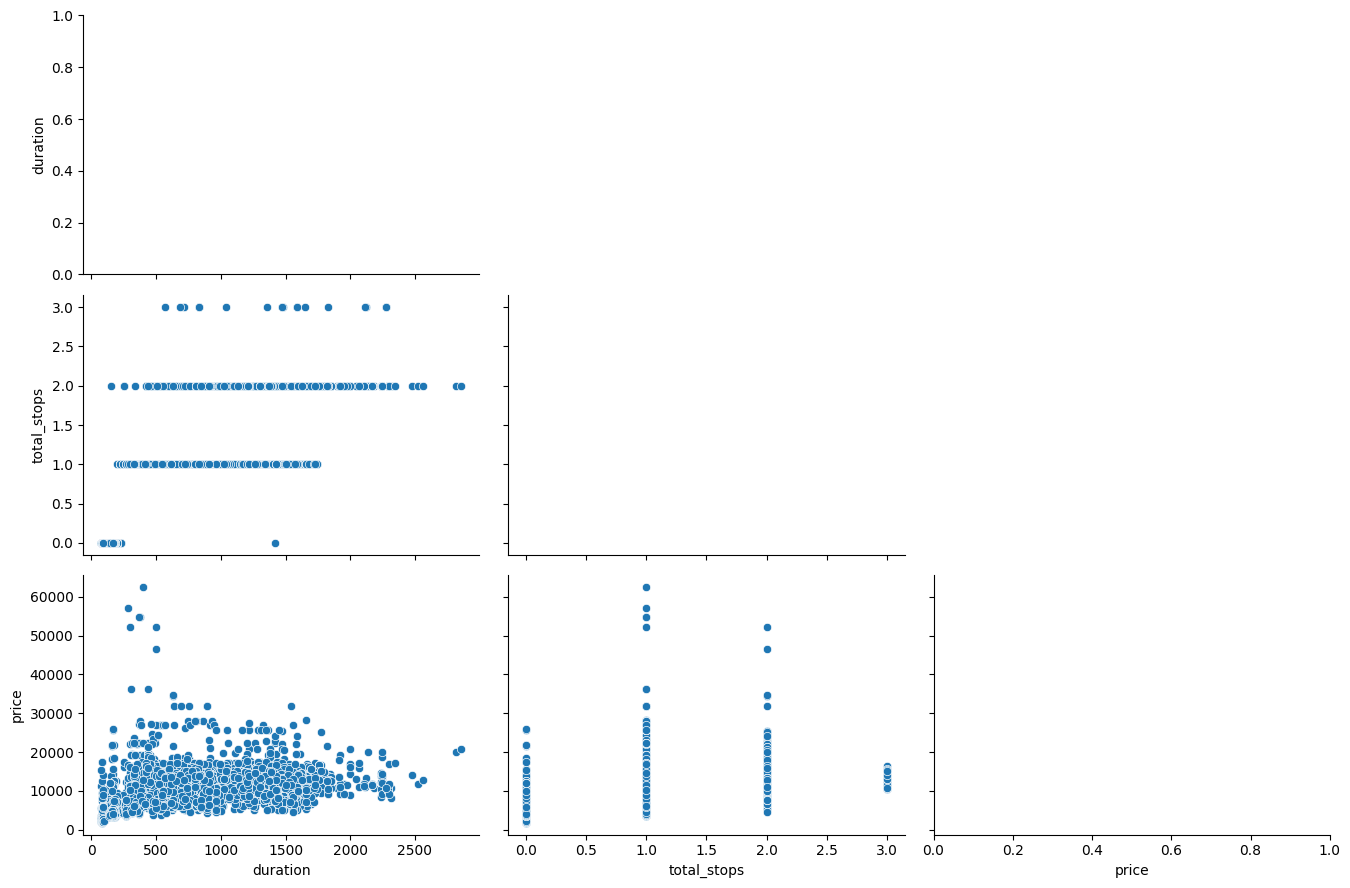

In [75]:
eda_helper_functions.pair_plots(train)

- Same for heatmap it only takes numerical columns

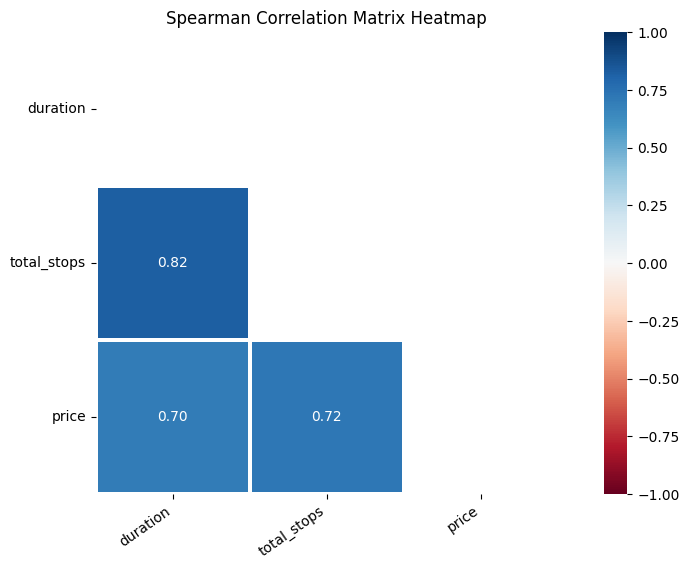

In [78]:
eda_helper_functions.correlation_heatmap(train)

- This is applied on Categorical variables as cramersV work better on categorical because it uses chi-square 

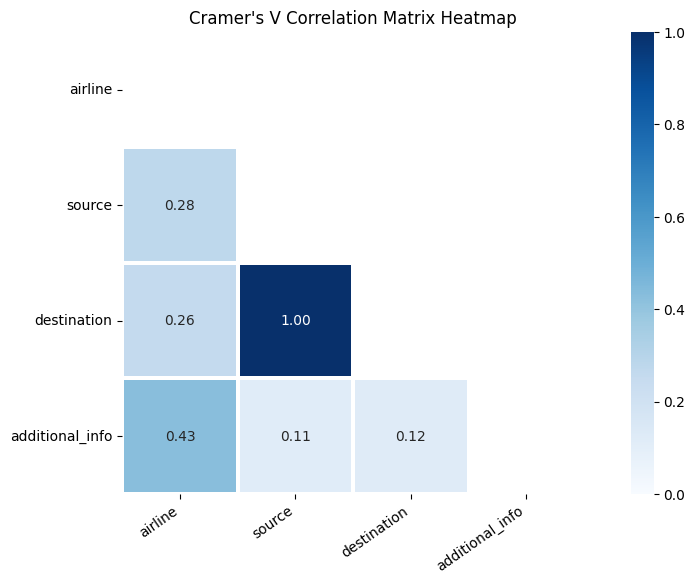

In [79]:
eda_helper_functions.cramersV_heatmap(train)